# Problem (1.17)

## Problem statement

A particle is represented (at time $t = 0$) by the wave function

$$
\Psi(x,0) = \left\{
            \begin{array}{11}
                A(a^2-x^2) \quad if -a \leq x \leq +a \\
                0 \quad otherwise
            \end{array}
            \right.
$$
1. Find $A$ 
2. What is the expectation value of $x$ (at time $t=0$)
3. What is the expectation values of $p$ (at time $t = 0$)? (Note that you cannot get it from $md\langle x \rangle / dt.$ Why not?)
4. Find the expectation value of $x^2$
5. Find the expectation value of $p^2$
6. Find the uncertainty in $x$ ($\sigma_x$)
7. Find the uncertianty in $p$ ($\sigma_p$)
8. Check that your results are consistent with the uncertainty principle

----

## Solution

To get $A$, we integrate $\lvert \Psi \rvert ^2$ over the non-zero interval $x = -a$ to $a$

In [1]:
import sympy as sp
sp.init_printing()

#define the symbols
A, a , x = sp.symbols('A a x', real = True)
#define psi over the non-zero interval
psi = A*(a**2-x**2)
psi

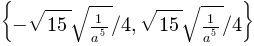

In [2]:
#get the probability density by calculating psi*psi
psisq = sp.conjugate(psi)*psi
psisq
#now integrate w/ respect to x from -a to a, set equal to 1 and solve for A
sp.integrate(psisq, (x, -a, a))

normalization_condition = sp.Eq(1, sp.integrate(psisq, (x, -a, a)))

sp.solveset(normalization_condition, A)

Here are the values for $A$, part 1 is done

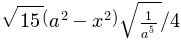

In [3]:
#substitute our solution for A
psi = psi.subs(A, next(iter(sp.solveset(normalization_condition, A))))
#I want the positive one
psi = -1*psi
psi

To get $\langle x \rangle$ use the following integral

$$ \int_{-a}^{+a}  \Psi^* x \Psi dx $$

In [4]:
#redefine psisq
psisq = sp.conjugate(psi)*psi

expectx = sp.integrate(x*psisq, (x, -a, a))
expectx

Here is $\langle x \rangle$ Part 2 is completed

We can replace $x$ in the previous integral with the momentum operator, $\frac{\hbar}{i} \frac{\partial}{\partial x}$


In [5]:
from sympy.physics.quantum.constants import hbar

expectp = sp.integrate(sp.conjugate(psi)*(hbar/sp.I)*sp.diff(psi, x), (x, -a, a))
expectp

Here we have $\langle p \rangle$, we can not use $m \frac{d \langle x \rangle}{dx}$ because we only have the wavefunction for one time

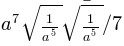

In [6]:
expectx2 = sp.integrate(x**2*psisq, (x, -a, a))
expectx2

Here is $\langle x^2 \rangle$

to get $\langle p^2 \rangle$ we can repeat the process of for $\langle p \rangle$, but square the momentum operator inside the integral

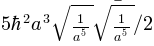

In [7]:
expectp2 = sp.integrate(sp.conjugate(psi)*(-(hbar**2))*sp.diff(psi, x ,2), (x, -a, a))
expectp2

Here we have $\langle p^2 \rangle$

To get the uncertainty in x, we can use the following equation

$$ \sigma_x = \sqrt{\langle x^2 \rangle - \langle x \rangle ^2} $$

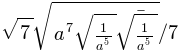

In [8]:
sigmax = sp.sqrt(expectx2 - (expectx)**2)
sigmax

Here is $\sigma_x$

Now we can do the same thing with the $p$ exectation values to get $\sigma_p$

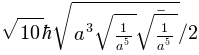

In [9]:
sigmap = sp.sqrt(expectp2 - (expectp)**2)
sigmap

Here is $\sigma_p$

Lastly we can check our result with the uncertainty principle

$$ \sigma_x\sigma_p \geq \frac{\hbar}{2} $$

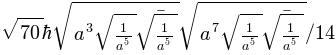

In [10]:
sigmaprod = sigmax*sigmap
sigmaprod

The $a's$ cancel out, so the uncertainty principle is satisfied

----

## Portfolio references
* Problem 1.3, 1.5, 1.9
## Index terms
* uncertainty principle
* Schrodinger equation
* expectation value
* standard deviation
* momentum operator
## Book references
* eq 1.33 and 1.35 on pages 16 and 17
## External references